# Class data #

First we will create separate subsets for Monday and Tuesday, then develop separate linear regression models to compare. 

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'cowplot' was built under R version 3.6.3"


Call:
lm(formula = Tree_height_m ~ dbh_cm, data = tree_mon)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.381  -9.886  -4.098   7.474  60.189 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.33583    1.33458  15.238  < 2e-16 ***
dbh_cm       0.13134    0.02028   6.477 4.93e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.95 on 250 degrees of freedom
Multiple R-squared:  0.1437,	Adjusted R-squared:  0.1403 
F-statistic: 41.95 on 1 and 250 DF,  p-value: 4.93e-10



Call:
lm(formula = Tree_height_m ~ dbh_cm, data = tree_tues)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.761  -5.882  -1.924   4.218  27.703 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.97878    0.97955  13.250  < 2e-16 ***
dbh_cm       0.20161    0.02348   8.586 4.04e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.477 on 181 degrees of freedom
Multiple R-squared:  0.2894,	Adjusted R-squared:  0.2855 
F-statistic: 73.73 on 1 and 181 DF,  p-value: 4.038e-15


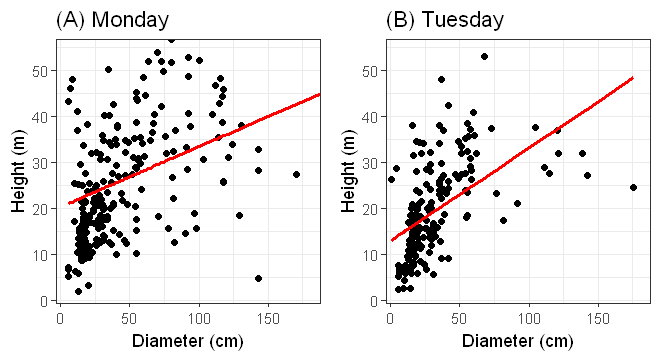

In [1]:
library(ggplot2)
library(cowplot)

tree_data <- read.csv('bees1041_tree_data_2023.csv')

tree_data$dbh_calc <- tree_data$Circumference_cm / pi
tree_data$dbh_error <- abs(tree_data$dbh_cm - tree_data$dbh_calc)
tree_data <- subset(tree_data, dbh_error < 10) # Use a threshold error of 10 cm

tree_data$Angle_radians <- tree_data$Angle * (pi/180)
tree_data$tree_height_calc <- tree_data$Eye_height_m + (tree_data$Distance_m * tan(tree_data$Angle_radians))
tree_data$height_error <- abs(tree_data$Tree_height_m - tree_data$tree_height_calc)
tree_data <- subset(tree_data, height_error < 5) # Use a treshold error of 10 m

tree_data <- subset(tree_data, Tree_type == 'Eucalyptus grandis')

# Add a column for day using the with() and ifelse() functions
tree_data$Day <- with(tree_data, ifelse(Class == 'Monday AM' | Class == 'Monday PM', "Monday", "Tuesday"))

tree_mon <- subset(tree_data, Day == 'Monday')

tree_tues <- subset(tree_data, Day == 'Tuesday')

mon_model <- lm(data = tree_mon, Tree_height_m ~ dbh_cm)
summary(mon_model)
tree_mon$predicted_height <- predict(mon_model)

tues_model <- lm(data = tree_tues, Tree_height_m ~ dbh_cm)
summary(tues_model)
tree_tues$predicted_height <- predict(tues_model)

monday <- ggplot(tree_mon, aes(x = dbh_cm, y = Tree_height_m)) +
                    geom_point() +
                    labs(x = "Diameter (cm)", y = "Height (m)", title = "(A) Monday") +
                    theme_bw() +
                    geom_line(aes(y = predicted_height), size = 1, color = 'red') +
                    coord_cartesian(xlim=c(min(tree_mon$dbh_cm), 1.02*max(tree_tues$dbh_cm)),
                                    ylim=c(min(tree_mon$Tree_height_m), 1.02*max(tree_tues$Tree_height_m)))

tuesday <- ggplot(tree_tues, aes(x = dbh_cm, y = Tree_height_m)) +
                   geom_point() +
                   labs(x = "Diameter (cm)", y = "Height (m)", title = "(B) Tuesday") +
                   theme_bw() +
                   geom_line(aes(y = predicted_height), size = 1, color = 'red') +
                   coord_cartesian(xlim=c(min(tree_mon$dbh_cm), 1.02*max(tree_tues$dbh_cm)),
                                   ylim=c(min(tree_mon$Tree_height_m), 1.02*max(tree_tues$Tree_height_m)))

options(repr.plot.width=5.5, repr.plot.height=3)
plot_grid(monday, tuesday, ncol = 2, align = "h")


# Ausplot forests data #

First, I will load the Ausplots Forests data and create the same subset of Eucalypt species we had in the exercise.

The last line of code prints out the number of trees for six species that were measured the most.

In [2]:
library(tidyverse)

ausplots_data <- read.csv('ausplot_forest_data.csv')

ausplots_subset <- subset(ausplots_data,
                          (Point_Of_Measurement == 1.3) &
                          (Diameter > 0) &
                          (Height > 0) &
                          (Tree_Status == 'A'))

ausplots_subset <- separate(ausplots_subset, Genus_Species, c("Genus", "Species"),
                            sep = " ", extra = "drop",
                            remove = FALSE, fill = "right")

ausplots_subset <- subset(ausplots_subset,
                          (Genus == "Eucalyptus") |
                          (Genus == "Angophora") |
                          (Genus == "Corymbia"))

ausplot_model <- lm(Height ~ Diameter, data = ausplots_subset)
ausplots_subset$predicted_height <- predict(ausplot_model)

tree_counts <- table(ausplots_subset$Genus_Species)
head(tree_counts[order(tree_counts, decreasing = TRUE)])

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1       v purrr   0.3.2  
v tidyr   0.8.3       v dplyr   0.8.0.1
v readr   1.3.1       v stringr 1.4.0  
v tibble  2.1.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



Eucalyptus diversicolor      Eucalyptus obliqua      Eucalyptus grandis 
                    391                     331                     236 
     Eucalyptus regnans Eucalyptus delegatensis    Eucalyptus fastigata 
                    204                     128                     103 

Now I will make plots for each of these species, adding a line for the regression model, and including the $R^2$ value. I also add a dashed line for the regression model we created from the whole dataset. Once I had a good plot for the first species I copied and pasted for the other graphs, just changing the species name.

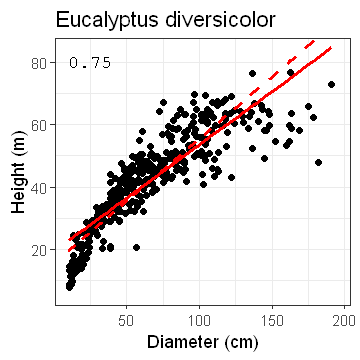

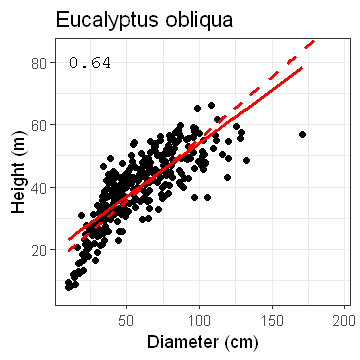

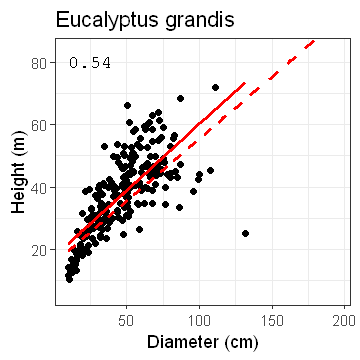

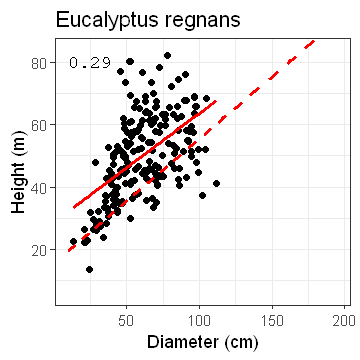

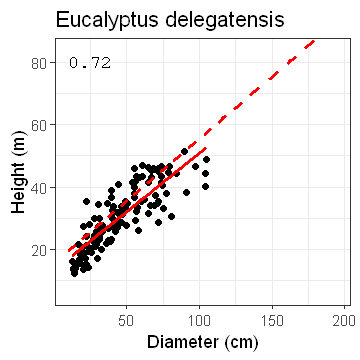

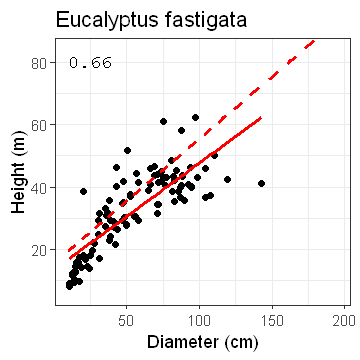

In [3]:
options(repr.plot.width=3, repr.plot.height=3)

species <- "Eucalyptus diversicolor"
euc_subset <- subset(ausplots_subset, Genus_Species == species)
model <- lm(Height ~ Diameter, data = euc_subset)
rsquared <- summary(model)$r.squared
euc_subset$predicted_height <- predict(model)
print(ggplot(euc_subset, aes(x = Diameter, y = Height)) +
       geom_point() +
       labs(x = "Diameter (cm)", y = "Height (m)", title = species) +
       geom_line(aes(y = predicted_height), size = 1, color = 'red') +
       geom_line(data = ausplots_subset, aes(x = Diameter, y = predicted_height), size = 1, color = 'red', linetype = 2) +
       theme_bw() +
       geom_text(x = 25, y = 80, aes(label = format(rsquared, digits = 2), family = 'mono')) +
       coord_cartesian(xlim=c(min(ausplots_subset$Diameter), 1.02*max(ausplots_subset$Diameter)),
                       ylim=c(min(ausplots_subset$Height), 1.02*max(ausplots_subset$Height))))

species <- "Eucalyptus obliqua"
euc_subset <- subset(ausplots_subset, Genus_Species == species)
model <- lm(Height ~ Diameter, data = euc_subset)
rsquared <- summary(model)$r.squared
euc_subset$predicted_height <- predict(model)
print(ggplot(euc_subset, aes(x = Diameter, y = Height)) +
       geom_point() +
       labs(x = "Diameter (cm)", y = "Height (m)", title = species) +
       geom_line(aes(y = predicted_height), size = 1, color = 'red') +
       geom_line(data = ausplots_subset, aes(x = Diameter, y = predicted_height), size = 1, color = 'red', linetype = 2) +
       theme_bw() +
       geom_text(x = 25, y = 80, aes(label = format(rsquared, digits = 2), family = 'mono')) +
       coord_cartesian(xlim=c(min(ausplots_subset$Diameter), 1.02*max(ausplots_subset$Diameter)),
                       ylim=c(min(ausplots_subset$Height), 1.02*max(ausplots_subset$Height))))

species <- "Eucalyptus grandis"
euc_subset <- subset(ausplots_subset, Genus_Species == species)
model <- lm(Height ~ Diameter, data = euc_subset)
rsquared <- summary(model)$r.squared
euc_subset$predicted_height <- predict(model)
print(ggplot(euc_subset, aes(x = Diameter, y = Height)) +
       geom_point() +
       labs(x = "Diameter (cm)", y = "Height (m)", title = species) +
       geom_line(aes(y = predicted_height), size = 1, color = 'red') +
       geom_line(data = ausplots_subset, aes(x = Diameter, y = predicted_height), size = 1, color = 'red', linetype = 2) +
       theme_bw() +
       geom_text(x = 25, y = 80, aes(label = format(rsquared, digits = 2), family = 'mono')) +
       coord_cartesian(xlim=c(min(ausplots_subset$Diameter), 1.02*max(ausplots_subset$Diameter)),
                       ylim=c(min(ausplots_subset$Height), 1.02*max(ausplots_subset$Height))))

species <- "Eucalyptus regnans"
euc_subset <- subset(ausplots_subset, Genus_Species == species)
model <- lm(Height ~ Diameter, data = euc_subset)
rsquared <- summary(model)$r.squared
euc_subset$predicted_height <- predict(model)
print(ggplot(euc_subset, aes(x = Diameter, y = Height)) +
       geom_point() +
       labs(x = "Diameter (cm)", y = "Height (m)", title = species) +
       geom_line(aes(y = predicted_height), size = 1, color = 'red') +
       geom_line(data = ausplots_subset, aes(x = Diameter, y = predicted_height), size = 1, color = 'red', linetype = 2) +
       theme_bw() +
       geom_text(x = 25, y = 80, aes(label = format(rsquared, digits = 2), family = 'mono')) +
       coord_cartesian(xlim=c(min(ausplots_subset$Diameter), 1.02*max(ausplots_subset$Diameter)),
                       ylim=c(min(ausplots_subset$Height), 1.02*max(ausplots_subset$Height))))

species <- "Eucalyptus delegatensis"
euc_subset <- subset(ausplots_subset, Genus_Species == species)
model <- lm(Height ~ Diameter, data = euc_subset)
rsquared <- summary(model)$r.squared
euc_subset$predicted_height <- predict(model)
print(ggplot(euc_subset, aes(x = Diameter, y = Height)) +
       geom_point() +
       labs(x = "Diameter (cm)", y = "Height (m)", title = species) +
       geom_line(aes(y = predicted_height), size = 1, color = 'red') +
       geom_line(data = ausplots_subset, aes(x = Diameter, y = predicted_height), size = 1, color = 'red', linetype = 2) +
       theme_bw() +
       geom_text(x = 25, y = 80, aes(label = format(rsquared, digits = 2), family = 'mono')) +
       coord_cartesian(xlim=c(min(ausplots_subset$Diameter), 1.02*max(ausplots_subset$Diameter)),
                       ylim=c(min(ausplots_subset$Height), 1.02*max(ausplots_subset$Height))))


species <- "Eucalyptus fastigata"
euc_subset <- subset(ausplots_subset, Genus_Species == species)
model <- lm(Height ~ Diameter, data = euc_subset)
rsquared <- summary(model)$r.squared
euc_subset$predicted_height <- predict(model)
print(ggplot(euc_subset, aes(x = Diameter, y = Height)) +
       geom_point() +
       labs(x = "Diameter (cm)", y = "Height (m)", title = species) +
       geom_line(aes(y = predicted_height), size = 1, color = 'red') +
       geom_line(data = ausplots_subset, aes(x = Diameter, y = predicted_height), size = 1, color = 'red', linetype = 2) +
       theme_bw() +
       geom_text(x = 25, y = 80, aes(label = format(rsquared, digits = 2), family = 'mono')) +
       coord_cartesian(xlim=c(min(ausplots_subset$Diameter), 1.02*max(ausplots_subset$Diameter)),
                       ylim=c(min(ausplots_subset$Height), 1.02*max(ausplots_subset$Height))))